[View in Colaboratory](https://colab.research.google.com/github/scubamut/backtests/blob/master/BACKTEST_STEP_BY_STEP.ipynb)

In [1]:
from __future__ import print_function
from IPython.utils.path import get_ipython_dir
print(get_ipython().profile_dir.location)

/content/.ipython/profile_default


In [184]:
!pip install git+https://github.com/scubamut/fintools.git
!pip install cvxopt
!pip install pyfolio
!pip install ffn
!pip install itable

  Cloning https://github.com/scubamut/fintools.git to /tmp/pip-req-build-c7_t4f8k
  Running setup.py bdist_wheel for fintools ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-dul_iz_2/wheels/31/8c/f2/b804e06272798f0f915e278c6e44fe46c927321835e506c256
Successfully built fintools


In [0]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import itable
import ffn

In [0]:
from fintools.Parameters import Parameters
from fintools.set_start_end import set_start_end
from fintools.get_yahoo_prices import get_yahoo_prices
from fintools.compute_weights_RS_DM import compute_weights_RS_DM
from fintools.compute_weights_PMA import compute_weights_PMA
from fintools.endpoints import endpoints
from fintools.backtest import backtest
from fintools.monthly_return_table import monthly_return_table
from fintools.show_return_table import show_return_table

# STEP BY STEP BACKTEST

In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['VCVSX','VWINX','VWEHX','VGHCX','VFIIX','VWAHX','FGOVX','FFXSX']

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2000-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = web.DataReader(tickers, data_source, start_date, end_date)

panel_data

Attributes   High                                                           \
Symbols     FFXSX  FGOVX  VCVSX  VFIIX       VGHCX  VWAHX VWEHX      VWINX   
Date                                                                         
2000-01-03   9.04   9.30  13.45   9.83   94.699997  10.01  7.37  18.600000   
2000-01-04   9.05   9.33  13.03   9.83   91.629997  10.01  7.35  18.520000   
2000-01-05   9.04   9.29  12.97   9.78   92.900002   9.99  7.33  18.610001   
2000-01-06   9.05   9.32  12.89   9.81   95.320000   9.99  7.33  18.820000   
2000-01-07   9.05   9.34  13.09   9.83  100.199997  10.00  7.33  19.010000   
2000-01-10   9.04   9.32  13.60   9.81  101.019997  10.00  7.32  18.900000   
2000-01-11   9.03   9.27  13.48   9.76  100.000000   9.98  7.31  18.770000   
2000-01-12   9.02   9.26  13.42   9.75   99.690002   9.97  7.30  18.780001   
2000-01-13   9.04   9.30  13.71   9.78  102.400002   9.97  7.29  18.879999   
2000-01-14   9.03   9.28  13.92   9.76  103.480003   9.97  7.29  18.809999   
2000-01-18   9.02   9.26  14.11   9.73  102.430000   9.96  7.28  18.740000   
2000-01-19   9.02   9.27  14.23   9.74  102.910004   9.95  7.28  18.770000   
2000-01-20   9.01   9.26  14.43   9.72  102.250000   9.94  7.28  18.660000   
2000-01-21   9.02   9.26  14.51   9.72  102.620003   9.91  7.27  18.690001   
2000-01-24   9.03   9.30  14.42   9.76   99.059998   9.91  7.29  18.700001   
2000-01-25   9.03   9.30  14.35   9.76   98.050003   9.91  7.29  18.620001   
2000-01-26   9.03   9.31  14.21   9.77   99.070000   9.91  7.29  18.670000   
2000-01-27   9.02   9.31  14.13   9.76   98.160004   9.90  7.29  18.680000   
2000-01-28   9.01   9.32  13.82   9.75   97.519997   9.89  7.28  18.590000   
2000-01-31   9.00   9.29  13.79   9.71   98.839996   9.87  7.28  18.660000   
2000-02-01   9.01   9.31  14.01   9.74  100.010002   9.87  7.28  18.670000   
2000-02-02   9.00   9.31  14.17   9.73  101.089996   9.88  7.28  18.650000   
2000-02-03   9.01   9.34  14.41   9.75  102.500000   9.91  7.29  18.700001   
2000-02-04   9.00   9.32  14.43   9.74  102.330002   9.91  7.28  18.549999   
2000-02-07   8.99   9.29  14.55   9.71  103.230003   9.90  7.27  18.450001   
2000-02-08   8.99   9.33  14.71   9.74  105.389999   9.91  7.28  18.520000   
2000-02-09   8.99   9.30  14.66   9.72  103.250000   9.91  7.27  18.330000   
2000-02-10   8.99   9.28  14.81   9.71  101.529999   9.91  7.27  18.260000   
2000-02-11   9.00   9.29  14.64   9.71   99.300003   9.92  7.27  18.170000   
2000-02-14   9.01   9.33  14.67   9.74   99.250000   9.92  7.27  18.280001   
...           ...    ...    ...    ...         ...    ...   ...        ...   
2016-11-17  10.00  10.28  12.64  10.69  201.740005  11.13  5.77  25.590000   
2016-11-18   9.99  10.25  12.63  10.65  198.880005  11.10  5.76  25.530001   
2016-11-21   9.99  10.26  12.67  10.64  200.050003  11.08  5.76  25.610001   
2016-11-22   9.99  10.26  12.67  10.65  197.720001  11.05  5.78  25.629999   
2016-11-23   9.98  10.24  12.69  10.62  197.770004  11.03  5.78  25.590000   
2016-11-25   9.98  10.23  12.71  10.60  198.089996  11.03  5.78  25.650000   
2016-11-28   9.99  10.26  12.66  10.64  196.250000  11.01  5.78  25.680000   
2016-11-29   9.99  10.26  12.65  10.65  196.910004  10.99  5.78  25.690001   
2016-11-30   9.98  10.23  12.67  10.63  195.009995  10.93  5.78  25.620001   
2016-12-01   9.97  10.20  12.60  10.62  192.839996  10.87  5.78  25.559999   
2016-12-02   9.98  10.22  12.60  10.64  193.369995  10.88  5.77  25.610001   
2016-12-05   9.98  10.22  12.67  10.63  193.100006  10.89  5.78  25.660000   
2016-12-06   9.98  10.22  12.72  10.64  193.559998  10.93  5.80  25.680000   
2016-12-07   9.99  10.24  12.78  10.66  191.520004  11.02  5.82  25.860001   
2016-12-08   9.99  10.22  12.85  10.64  191.960007  11.01  5.82  25.820000   
2016-12-09   9.98  10.16  12.86  10.62  194.399994  11.00  5.83  25.840000   
2016-12-12   9.98  10.16  12.82  10.62  194.520004  10.97  5.84  25.870001   
2016-12-13   9.97  10.

In [0]:
symbols =['VCVSX','VWINX','VWEHX','VGHCX','VFIIX','VWAHX','FGOVX','FFXSX']
cash_proxy = 'VUSTX'
risk_free = 0


# get data
tickers = symbols.copy()
if cash_proxy != 'CASHX' :
    tickers = list(set(tickers + [cash_proxy]))
if isinstance(risk_free, str) :
    tickers = list(set(tickers + [risk_free]))



In [5]:
# from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2018-05-31'

In [0]:
# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '1986-01-01'
start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

In [8]:
# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = web.DataReader(tickers, data_source, start_date, end_date)

panel_data[:5]

Attributes  High                                                               \
Symbols    FFXSX FGOVX  VCVSX VFIIX       VGHCX VUSTX  VWAHX VWEHX      VWINX   
Date                                                                            
2000-01-03  9.04  9.30  13.45  9.83   94.699997  9.58  10.01  7.37  18.600000   
2000-01-04  9.05  9.33  13.03  9.83   91.629997  9.65  10.01  7.35  18.520000   
2000-01-05  9.04  9.29  12.97  9.78   92.900002  9.56   9.99  7.33  18.610001   
2000-01-06  9.05  9.32  12.89  9.81   95.320000  9.63   9.99  7.33  18.820000   
2000-01-07  9.05  9.34  13.09  9.83  100.199997  9.67  10.00  7.33  19.010000   

Attributes   Low    ...    Volume Adj Close                                \
Symbols    FFXSX    ...     VWINX     FFXSX     FGOVX     VCVSX     VFIIX   
Date                ...                                                     
2000-01-03  9.04    ...       0.0  5.502506  4.491207  4.418780  4.360057   
2000-01-04  9.05    ...       0.0  5.508595  4.505697  4.280795  4.360057   
2000-01-05  9.04    ...       0.0  5.502506  4.486382  4.261084  4.337883   
2000-01-06  9.05    ...       0.0  5.508595  4.500865  4.234804  4.351186   
2000-01-07  9.05    ...       0.0  5.508595  4.510528  4.300507  4.360057   

Attributes                                                     
Symbols         VGHCX     VUSTX     VWAHX     VWEHX     VWINX  
Date                                                           
2000-01-03  26.726952  3.446250  4.393833  2.041905  7.092514  
2000-01-04  25.860510  3.471431  4.393833  2.036364  7.062006  
2000-01-05  26.218946  3.439058  4.385054  2.030823  7.096326  
2000-01-06  26.901941  3.464238  4.385054  2.030823  7.176404  
2000-01-07  28.279205  3.478627  4.389448  2.030823  7.248850  

[5 rows x 54 columns]

In [9]:
data = panel_data['Adj Close'].sort_index(ascending=True)
data[:5]

Symbols,FFXSX,FGOVX,VCVSX,VFIIX,VGHCX,VUSTX,VWAHX,VWEHX,VWINX
Date,,,,,,,,,
2000-01-03,5.502506,4.491207,4.418780,4.360057,26.726952,3.446250,4.393833,2.041905,7.092514
2000-01-04,5.508595,4.505697,4.280795,4.360057,25.860510,3.471431,4.393833,2.036364,7.062006
2000-01-05,5.502506,4.486382,4.261084,4.337883,26.218946,3.439058,4.385054,2.030823,7.096326
2000-01-06,5.508595,4.500865,4.234804,4.351186,26.901941,3.464238,4.385054,2.030823,7.176404
2000-01-07,5.508595,4.510528,4.300507,4.360057,28.279205,3.478627,4.389448,2.030823,7.248850


In [10]:
prices = data.copy().dropna()
prices[:5]

Symbols,FFXSX,FGOVX,VCVSX,VFIIX,VGHCX,VUSTX,VWAHX,VWEHX,VWINX
Date,,,,,,,,,
2000-01-03,5.502506,4.491207,4.418780,4.360057,26.726952,3.446250,4.393833,2.041905,7.092514
2000-01-04,5.508595,4.505697,4.280795,4.360057,25.860510,3.471431,4.393833,2.036364,7.062006
2000-01-05,5.502506,4.486382,4.261084,4.337883,26.218946,3.439058,4.385054,2.030823,7.096326
2000-01-06,5.508595,4.500865,4.234804,4.351186,26.901941,3.464238,4.385054,2.030823,7.176404
2000-01-07,5.508595,4.510528,4.300507,4.360057,28.279205,3.478627,4.389448,2.030823,7.248850


In [0]:
end_points = endpoints(period='M', trading_days=prices.index)
prices_m = prices.loc[end_points]

rs_lookback = 1
risk_lookback = 1
n_top = 3

In [15]:
print(symbols)

['VCVSX', 'VWINX', 'VWEHX', 'VGHCX', 'VFIIX', 'VWAHX', 'FGOVX', 'FFXSX']


In [0]:
returns = prices_m[symbols].pct_change(rs_lookback)[rs_lookback:]
absolute_momentum_rule = returns > 0
if isinstance(risk_free, int) :
    excess_returns = returns
else :
    risk_free_returns =  prices_m[risk_free].pct_change(rs_lookback)[rs_lookback:]
    excess_returns = returns.subtract(risk_free_returns, axis=0).dropna()
    
rebalance_dates = excess_returns.index.join(absolute_momentum_rule.index, how='inner')

In [17]:
returns[:3]

Symbols,VCVSX,VWINX,VWEHX,VGHCX,VFIIX,VWAHX,FGOVX,FFXSX
Date,,,,,,,,
2000-02-29,0.105874,-0.030011,0.001411,0.021246,0.014156,0.014916,0.013707,0.007472
2000-03-31,0.006971,0.056018,-0.009069,0.082158,0.017121,0.023099,0.013908,0.007791
2000-04-28,-0.049836,0.001592,0.007500,0.023139,-0.001286,-0.005105,-0.002196,0.002126


In [18]:
# relative strength ranking               
ranked = excess_returns.loc[rebalance_dates][symbols].rank(ascending=False, axis=1, method='dense')
# elligibility rule - top n_top ranked securities
elligible = ranked[ranked<=n_top] > 0
elligible[:3]

Symbols,VCVSX,VWINX,VWEHX,VGHCX,VFIIX,VWAHX,FGOVX,FFXSX
Date,,,,,,,,
2000-02-29,True,False,False,True,False,True,False,False
2000-03-31,False,True,False,True,False,True,False,False
2000-04-28,False,False,True,True,False,False,False,True


In [19]:
# equal weight allocations
elligible = elligible.multiply(1./elligible.sum(1), axis=0)
elligible[:3]

Symbols,VCVSX,VWINX,VWEHX,VGHCX,VFIIX,VWAHX,FGOVX,FFXSX
Date,,,,,,,,
2000-02-29,0.333333,0.000000,0.000000,0.333333,0.0,0.333333,0.0,0.000000
2000-03-31,0.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.0,0.000000
2000-04-28,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.0,0.333333


In [20]:
prices.columns

Index(['FFXSX', 'FGOVX', 'VCVSX', 'VFIIX', 'VGHCX', 'VUSTX', 'VWAHX', 'VWEHX',
       'VWINX'],
      dtype='object', name='Symbols')

In [21]:
cash_proxy

'VUSTX'

In [22]:
# downside protection
weights = pd.DataFrame(0.,index=elligible.index, columns=prices.columns)
if cash_proxy == 'CASHX' :
    weights[cash_proxy] = 0
    prices[cash_proxy] = 1.
weights[symbols] = (elligible * absolute_momentum_rule).dropna() 
weights[:10]

Symbols,FFXSX,FGOVX,VCVSX,VFIIX,VGHCX,VUSTX,VWAHX,VWEHX,VWINX
Date,,,,,,,,,
2000-02-29,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.000000,0.000000
2000-03-31,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.333333,0.000000,0.333333
2000-04-28,0.333333,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.333333,0.000000
2000-05-31,0.000000,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.000000,0.333333
2000-06-30,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.000000,0.000000
2000-07-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.333333,0.333333
2000-08-31,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.000000,0.000000,0.333333
2000-09-29,0.000000,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.000000,0.333333
2000-10-31,0.000000,0.333333,0.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.333333


In [23]:
weights[cash_proxy] += 1 - weights[symbols].sum(axis=1)
weights[:10]

Symbols,FFXSX,FGOVX,VCVSX,VFIIX,VGHCX,VUSTX,VWAHX,VWEHX,VWINX
Date,,,,,,,,,
2000-02-29,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.000000,0.000000
2000-03-31,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.333333,0.000000,0.333333
2000-04-28,0.333333,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.333333,0.000000
2000-05-31,0.000000,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.000000,0.333333
2000-06-30,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.000000,0.000000
2000-07-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.333333,0.333333
2000-08-31,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.000000,0.000000,0.333333
2000-09-29,0.000000,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.000000,0.333333
2000-10-31,0.000000,0.333333,0.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.333333


In [24]:
date = rebalance_dates[0]
weights.loc[date]

Symbols
FFXSX    0.000000
FGOVX    0.000000
VCVSX    0.333333
VFIIX    0.000000
VGHCX    0.333333
VUSTX    0.000000
VWAHX    0.333333
VWEHX    0.000000
VWINX    0.000000
Name: 2000-02-29 00:00:00, dtype: float64

In [0]:
prices.loc[date]

VCVSX    1.209364
VWINX    2.085360
VWAHX    1.849020
VGHCX    2.687786
FGOVX    1.876035
VWEHX    0.728181
FFXSX    2.379192
VFIIX    1.692999
VUSTX    1.349658
Name: 1986-12-31 00:00:00, dtype: float64

In [25]:
(10000 * weights.loc[date] / prices.loc[date]).astype(int)

Symbols
FFXSX      0
FGOVX      0
VCVSX    665
VFIIX      0
VGHCX    117
VUSTX      0
VWAHX    754
VWEHX      0
VWINX      0
Name: 2000-02-29 00:00:00, dtype: int64

FIRST BUY DATE = 2000-02-29 00:00:00



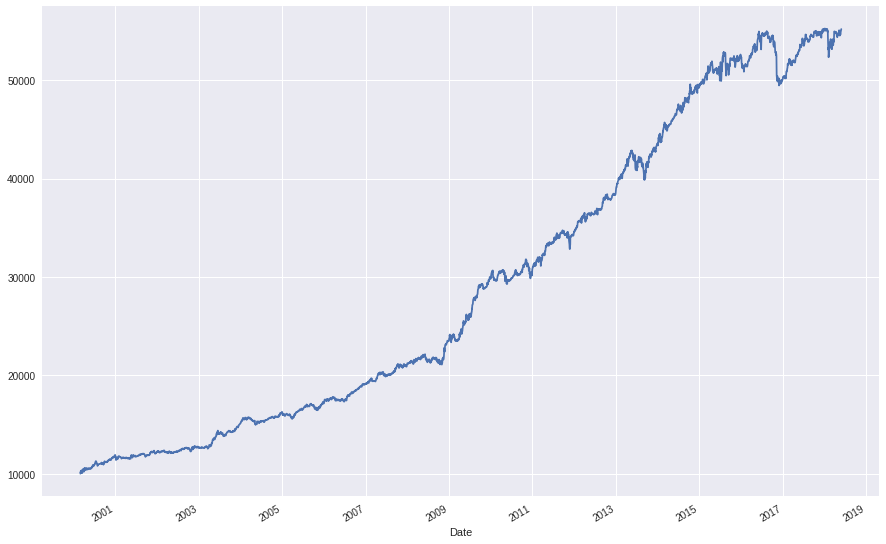

In [26]:
# backtest

p_value, p_holdings, p_weights = backtest(prices, weights, 10000., offset=0, commission=10.)

p_value.plot(figsize=(15,10), grid=True)

In [27]:
p_weights.loc[rebalance_dates]

Symbols,FFXSX,FGOVX,VCVSX,VFIIX,VGHCX,VUSTX,VWAHX,VWEHX,VWINX
Date,,,,,,,,,
2000-02-29,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000
2000-03-31,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333
2000-04-28,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000
2000-05-31,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333
2000-06-30,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000
2000-07-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333
2000-08-31,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333
2000-09-29,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333
2000-10-31,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333
